In [1]:
#11111111111111111111111111111111111111111111111111

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy import optimize
from datetime import date, timedelta
import random
import matplotlib.gridspec as gridspec

state_dic={
 'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}



#Fitting Functions
def q_exp(t,q,A,t_0,L):
    
    if q == 1:
        
        exp = A*(np.exp(L*(t-t_0)))
        
    else:
        
        f=[]
        for i in t:
        
            if A*(1+(1-q)*L*(i-t_0))<0:
                
                f.append(0)
            
            else:
                f.append(A*(1+(1-q)*L*(i-t_0))**(1/(1-q)))
                
            
    
        exp = np.array(f) 
        
    return exp
        


def objective_func(pars,data_s):  

    q,A,t_0,L=pars
    
    t=np.arange(len(data_s))
    y_f=q_exp(t,q,A,t_0,L)
    
    
    error=((data_s - y_f) / np.sqrt(1+y_f))
    
    return np.r_[error] 


def mini(data_s,n_tries):

    # #DEFINE THE INTERVALS OF PARS
    intervals = np.array(   [ [0., 2.],   #q
                           [0.01,20], #A 
                           [-10,10],  #t_0
                           [0.,2.5]   #L
                           ])

    #NUMBER OF FITS

    #best error starts at inft 
    best_err = np.inf
    #aj the number of best fists 
    aj = 0

    for i in range(n_tries):
        
        
        #create a set of parameters in the interval
        par0 = np.random.rand(len(intervals))
        par0 = intervals[:,0] + par0 * (intervals[:,1] - intervals[:,0])
        #try to fit

        res = least_squares(lambda pars: objective_func(pars,data_s), par0, bounds=(intervals[:,0], \
                                                 intervals[:,1]))
        
        ier = res.status
        #if converges
        if ier >= 1 and ier <= 4:
            if res.cost < best_err:
                #best_err = erro
                best_err = res.cost
                #best_pop = parametro
                best_pop = res.x
                #+1 best fit
                aj = aj +1
                print('achou',aj)

        #in does not converge, do nothing
        
        
    return best_pop

def FinD(s,file):
    FD=df_bf.loc[df_bf['Source']==s+'_'+file].t1_date.values[0]
    return FD

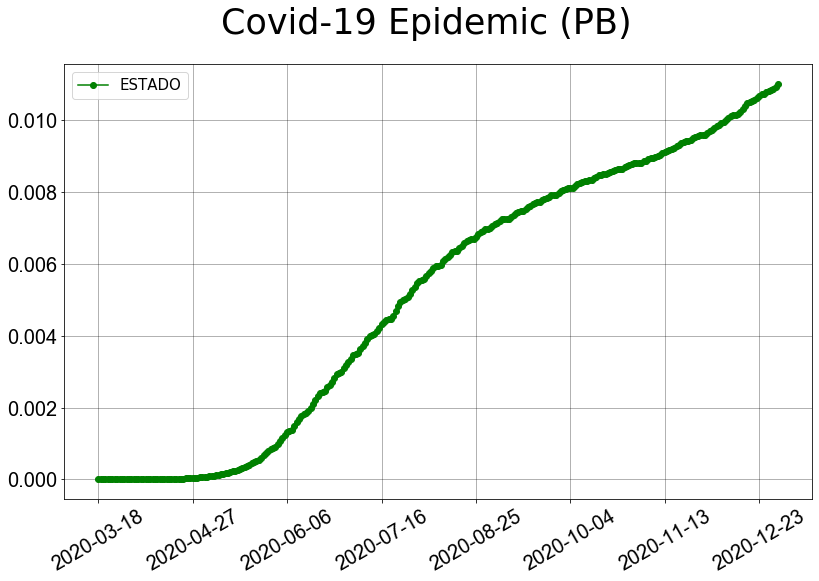

In [5]:
#Plotting Data

#Specify the file
#,'BA','RJ','AM','GO'
#ls=state_dic.keys()
ls=['PB']

lh=['estado','capital','interior']
POP_AME=3874000
POP_AMC=2020000
POP_AMI=POP_AME-POP_AMC
POP_BAE=15130000
POP_BAC=2886298
POP_BAI=POP_BAE-POP_BAC

for s in ls:
    #Read csv
    df_s=pd.read_csv('Data/'+s+"/estado.csv")
    df_c=pd.read_csv('Data/'+s+"/capital.csv")
    df_i=pd.read_csv('Data/'+s+"/interior.csv")
    
    if(s=='CE'):

    #Read the file
        #dates_i=df_i.date.values
        #data_i=df_i.cases.values/POP_AMI
    
        #dates_c=df_c.date.values
        #data_c=df_c.cases.values/POP_AMC
    
        dates_s=df_s.date.values
        data_s=df_s.cases.values
    else:
        #Read the file
        dates_i=df_i.date.values
        data_i=df_i.cases.values/POP_BAI
    
        dates_c=df_c.date.values
        data_c=df_c.cases.values/POP_BAC
    
        dates_s=df_s.date.values
        data_s=df_s.cases.values/POP_BAE
    
    
    

        #New cases
    #new_data=np.array([data[0]]+list(np.diff(data)))


    fig, ax = pl.subplots(figsize=(13.4,8))

    ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

    
    #ax.plot(dates_c,data_c, '-o',color='red',zorder=1,label='CAPITAL')
    #ax.plot(dates_i,data_i, '-o',color='purple',zorder=2,label='INTERIOR')
    ax.plot(dates_s,data_s, '-o', color='green',zorder=3,label='ESTADO')
    

    

    ax.tick_params(labelsize=20)




    ax.xaxis.set_major_locator(pl.MaxNLocator(10))
    pl.setp(ax.get_xticklabels(), rotation=30)





    for tick in ax.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")  

    ax.legend(loc='upper left',fontsize=15)
    ax.grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)
    fig.suptitle("Covid-19 Epidemic " + '(' + s + ')',fontsize=35)
    
    pl.show()

    fig.savefig(r"Figs\\"+s+".png",bbox_inches='tight')

In [41]:
df_c

,date,state,city,cases,deaths
0,2020-03-13,BA,Salvador/BA,3,0
1,2020-03-13,BA,Salvador/BA,3,0
2,2020-03-13,BA,Salvador/BA,3,0
3,2020-03-13,BA,Salvador/BA,3,0
4,2020-03-13,BA,Salvador/BA,3,0
...,...,...,...,...,...
296,2020-12-27,BA,Salvador/BA,108168,3157
297,2020-12-28,BA,Salvador/BA,108323,3160
298,2020-12-29,BA,Salvador/BA,108829,3163
299,2020-12-30,BA,Salvador/BA,109274,3168


achou 1
achou 2
achou 3
achou 4
achou 5
achou 6
achou 7
achou 8
achou 1
achou 2
achou 3
achou 4
achou 1
achou 2
achou 3
achou 4
achou 5
achou 6
achou 7
achou 8


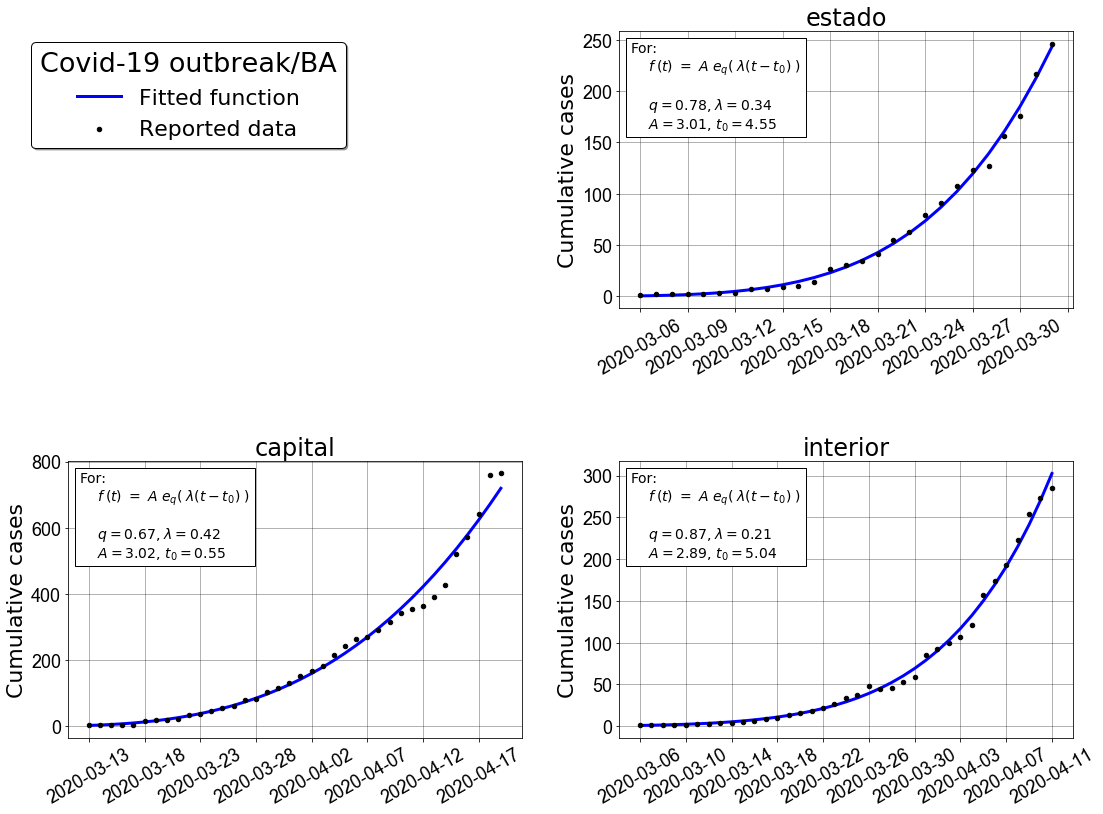

achou 1
achou 2
achou 3
achou 4
achou 5
achou 6
achou 7
achou 8
achou 1
achou 2
achou 3


C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_lower = -phi / phi_prime
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: invalid value encountered in double_scalars
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:371: RuntimeWarning: invalid value encountered in greater_equal
  return np.all((x >= lb) & (x <= ub))
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:371: RuntimeWarning: invalid value encountered in less_equal
  return np.all((x >= lb) & (x <= ub))
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:400: RuntimeWarning: invalid value

achou 1
achou 2
achou 3
achou 4
achou 5


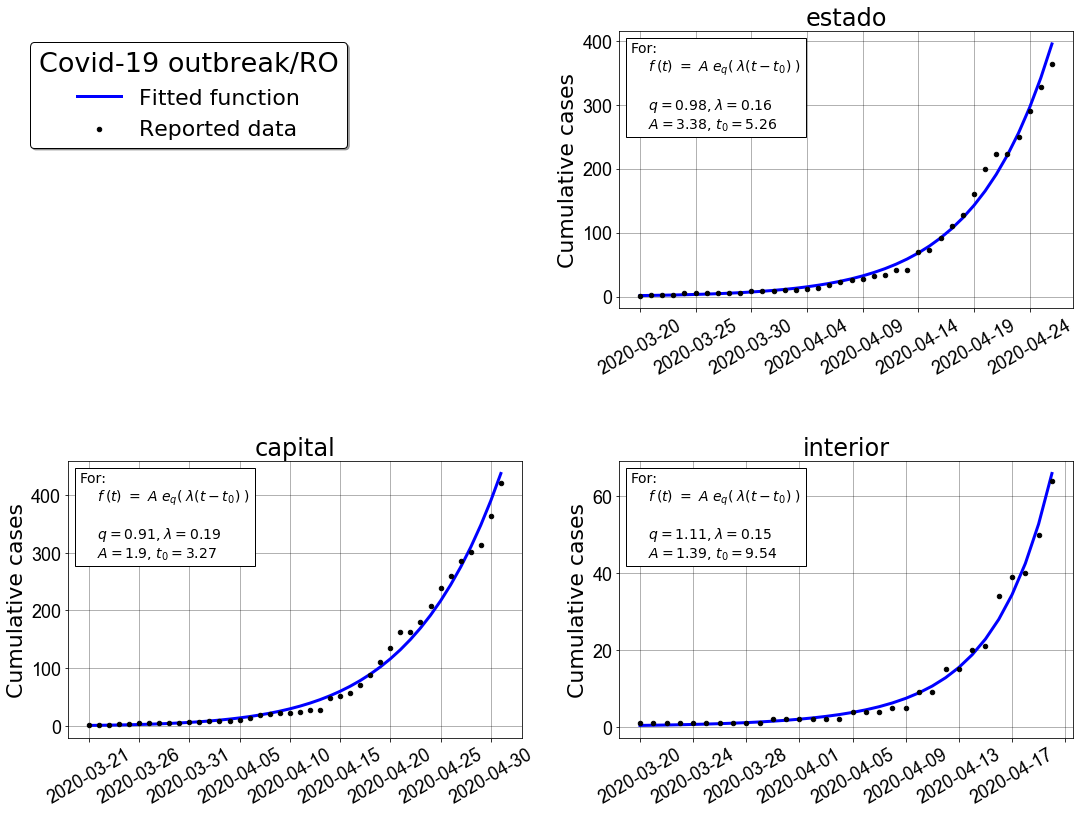

achou 1
achou 2
achou 3


C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_lower = -phi / phi_prime
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: invalid value encountered in double_scalars
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:371: RuntimeWarning: invalid value encountered in greater_equal
  return np.all((x >= lb) & (x <= ub))
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:371: RuntimeWarning: invalid value encountered in less_equal
  return np.all((x >= lb) & (x <= ub))
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:400: RuntimeWarning: invalid value

achou 1
achou 2
achou 3
achou 4
achou 1
achou 2
achou 3
achou 4
achou 5
achou 6


C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_lower = -phi / phi_prime
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:117: RuntimeWarning: invalid value encountered in double_scalars
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:371: RuntimeWarning: invalid value encountered in greater_equal
  return np.all((x >= lb) & (x <= ub))
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:371: RuntimeWarning: invalid value encountered in less_equal
  return np.all((x >= lb) & (x <= ub))
C:\Users\Robert\anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:400: RuntimeWarning: invalid value

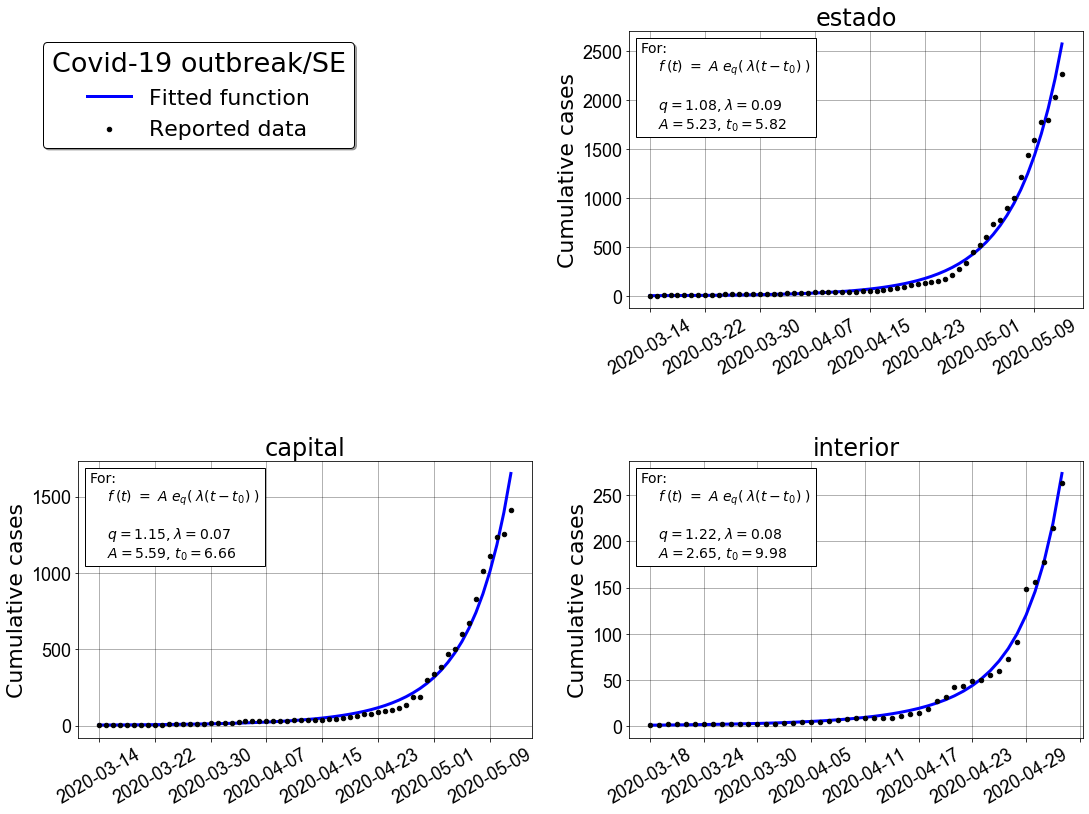

In [16]:
#4444444444444444444444444444444444444444444444444444444444444



#Fitting the q-exp

#Define the state and the type of fit: (estado,capital,interior)
#s=,'BA','GO','RJ','SP'
#,'capital','interior'
#LS=state_dic.keys()
LS=['BA','RO','SE']
df_bf=pd.read_csv('Best_Fits.csv')
miniq=[]
minit_0=[]
miniL=[]
miniA=[]
src=[]




for s in LS:
  
    if s == 'DF':
        
        gs = gridspec.GridSpec(nrows = 2, ncols = 4)

        #Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
        fig=pl.figure(figsize=(18,13))

        #Definir espaco em branco entre os plots
        gs.update(wspace = 0.55)
        gs.update(hspace = 0.55)

        ax=[]
        #Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
        ax1 = pl.subplot(gs[0, 2:]) #Ininicar um plot em branco no centro da primeira linha (0)

        ax.append(ax1)

        k=0


        LF = ['estado']   
        for file in LF:

            #Read csv
            df=pd.read_csv('Data/'+s+"/"+file+".csv")

            #Limit the date of the Fit
            FD = FinD(s,file)
            df = df[df['date']<=FD]

            #Read the file
            dates=df.date.values
            data=df.cases.values

            #Run the minimizer
            q,A,t_0,L=mini(data,85)

            #Create an x axixis for plotting the function.
            t_x=np.arange(len(data))
            
            #saving pars in dataframe
            
            
            miniq.append(q)
            miniA.append(A)
            minit_0.append(t_0)
            miniL.append(L)
            src.append(s+'_'+file)




            #Plotting

            #Create a grid for visualization.
            ax[k].grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

            #Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
            ax[k].scatter(dates,data, s=20,color='black',zorder=3,label='Reported data')

            #Plot the fitted function as a line.
            ax[k].plot(dates,q_exp(t_x,q,A,t_0,L),color='blue', linewidth=3.0,label='Fitted function')





            #Avons

            #If you want to limit the Y axixis -> ax.set_ylim(0.,y_lim).

            #set the legend box
            ax[k].legend(loc='upper left',fontsize=12,fancybox=False, edgecolor='black',facecolor='w',framealpha=1)

            #Set the annotation for the outputs
            annotation_string = r"""For:
    $f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

    $q = ${0}, $\lambda = ${1}
    $A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

            ax[k].annotate(annotation_string, xy=(0.025, 0.42), xycoords='axes fraction',
                                                         backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=10)



            #Set the labels
            ax[k].set_ylabel('Cumulative cases',fontsize=22)

            #Set the title
            ax[k].set_title('Covid-19 Outbreak '+s+'/'+file,fontsize=25)

            #The size of the numbers on the axixis
            ax[k].tick_params(labelsize=18)

            #Limiting the ammount of dates on the X axixs
            ax[k].xaxis.set_major_locator(pl.MaxNLocator(10))
            #Rotating the dates for better visualization
            pl.setp(ax[k].get_xticklabels(), rotation=30)


            #Setting the font of the numbers on the axixis as ARIAL 
            for tick in ax[k].get_xticklabels():
                tick.set_fontname("Arial")
            for tick in ax[k].get_yticklabels():
                tick.set_fontname("Arial")  



            k+=1

        #Show Graph       
        #pl.show()

        #Save Fig
        #fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')
        
        
        
    else:
        LF=['estado', 'capital','interior']

        gs = gridspec.GridSpec(nrows = 2, ncols = 4)

        #Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
        fig=pl.figure(figsize=(18,13))

        #Definir espaco em branco entre os plots
        gs.update(wspace = 0.55)
        gs.update(hspace = 0.55)

        ax=[]
        #Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
        ax1 = pl.subplot(gs[0, 2:]) #Ininicar um plot em branco no centro da primeira linha (0)
        ax2 = pl.subplot(gs[1, :2])  #Ininicar um plot em branco na primeira posicao da segunda linha
        ax3 = pl.subplot(gs[1, 2:])  #Ininicar um plot em branco no segunda posicao da seguna linha

        ax.append(ax1)
        ax.append(ax2)
        ax.append(ax3)
        
        #ax.set_title("Robert Gabriel de Araujo (UFBA)", fontsize=15)

        k=0 


        for file in LF:

            #Read csv
            df=pd.read_csv('Data/'+s+"/"+file+".csv")

            #Limit the date of the Fit
            FD = FinD(s,file)
            df = df[df['date']<=FD]

            #Read the file
            dates=df.date.values
            data=df.cases.values

            #Run the minimizer
            q,A,t_0,L=mini(data,85)
            

            #Create an x axixis for plotting the function.
            t_x=np.arange(len(data))


            #saving pars in dataframe
            
            miniq.append(q)
            miniA.append(A)
            minit_0.append(t_0)
            miniL.append(L)
            src.append(s+'_'+file)
            



            #Plotting

            #Create a grid for visualization.
            ax[k].grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

            #Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
            ax[k].scatter(dates,data, s=20,color='black',zorder=3,label='Reported data')

            #Plot the fitted function as a line.
            ax[k].plot(dates,q_exp(t_x,q,A,t_0,L),color='blue', linewidth=3.0,label='Fitted function')





            #Avons
            
            

            #If you want to limit the Y axixis -> ax.set_ylim(0.,y_lim).
            
            if k==0:

                #set the legend box
                ax[k].legend(loc='upper left',fontsize=14,fancybox=False, edgecolor='black',facecolor='w',framealpha=1)

                #Set the annotation for the outputs
                annotation_string = r"""For:
    $f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

    $q = ${0}, $\lambda = ${1}
    $A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

                ax[k].annotate(annotation_string, xy=(0.025,  0.65), xycoords='axes fraction',
                                                             backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=14)

            else:
                 #Set the annotation for the outputs
                annotation_string = r"""For:
    $f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

    $q = ${0}, $\lambda = ${1}
    $A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

                ax[k].annotate(annotation_string, xy=(0.025, 0.65), xycoords='axes fraction',
                                                             backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=14)

                

            #Set the labels
            ax[k].set_ylabel('Cumulative cases',fontsize=22)

            #Set the title
            ax[k].set_title(file,fontsize=24)

            #The size of the numbers on the axixis
            ax[k].tick_params(labelsize=18)

            #Limiting the ammount of dates on the X axixs
            ax[k].xaxis.set_major_locator(pl.MaxNLocator(10))
            #Rotating the dates for better visualization
            pl.setp(ax[k].get_xticklabels(), rotation=30)


            #Setting the font of the numbers on the axixis as ARIAL 
            for tick in ax[k].get_xticklabels():
                tick.set_fontname("Arial")
            for tick in ax[k].get_yticklabels():
                tick.set_fontname("Arial")  



            k+=1
            
        ax1.legend(loc='upper center',title='Covid-19 outbreak/'+s ,title_fontsize=27, bbox_to_anchor=(-0.95, 1),fontsize=22,fancybox=True, shadow=True,framealpha=None,edgecolor='inherit')
        
        #Show Graph       
        pl.show()

        #Save Fig
        #fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')
        

datfrm = {'Source':src,
        'q': miniq,
        'A':miniA,
        't_0':minit_0,
        'L':miniL
        }

dfrm=pd.DataFrame(datfrm, columns = ['Source','q','A','t_0','L'])

dfrm.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='covid_dataframe.csv')  
dfrm.to_csv('covid_dataframe.zip', index=False,
          compression=compression_opts)

In [17]:
datfrm = {'Source':src,
        'q': miniq,
        'A':miniA,
        't_0':minit_0,
        'L':miniL
        }

dfrm=pd.DataFrame(datfrm, columns = ['Source','q','A','t_0','L'])

print(dfrm)
dfrm.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='covid_dataframe.csv')  
dfrm.to_csv('covid_dataframe.zip', index=False,
          compression=compression_opts)

        Source         q         A       t_0         L
0    BA_estado  0.781667  3.006878  4.551618  0.343683
1   BA_capital  0.674114  3.019287  0.546383  0.416796
2  BA_interior  0.865003  2.894242  5.041842  0.208948
3    RO_estado  0.984086  3.377821  5.258630  0.155841
4   RO_capital  0.907595  1.895716  3.267840  0.187358
5  RO_interior  1.111874  1.392480  9.542726  0.146035
6    SE_estado  1.082494  5.228793  5.820134  0.089560
7   SE_capital  1.147489  5.590318  6.655651  0.073550
8  SE_interior  1.221931  2.654694  9.984374  0.080381


achou 1
achou 2
achou 3
achou 4
achou 5
achou 6
achou 1
achou 2
achou 3
achou 4
achou 5
achou 6
achou 7
achou 8
achou 1
achou 2
achou 3
achou 4
achou 5


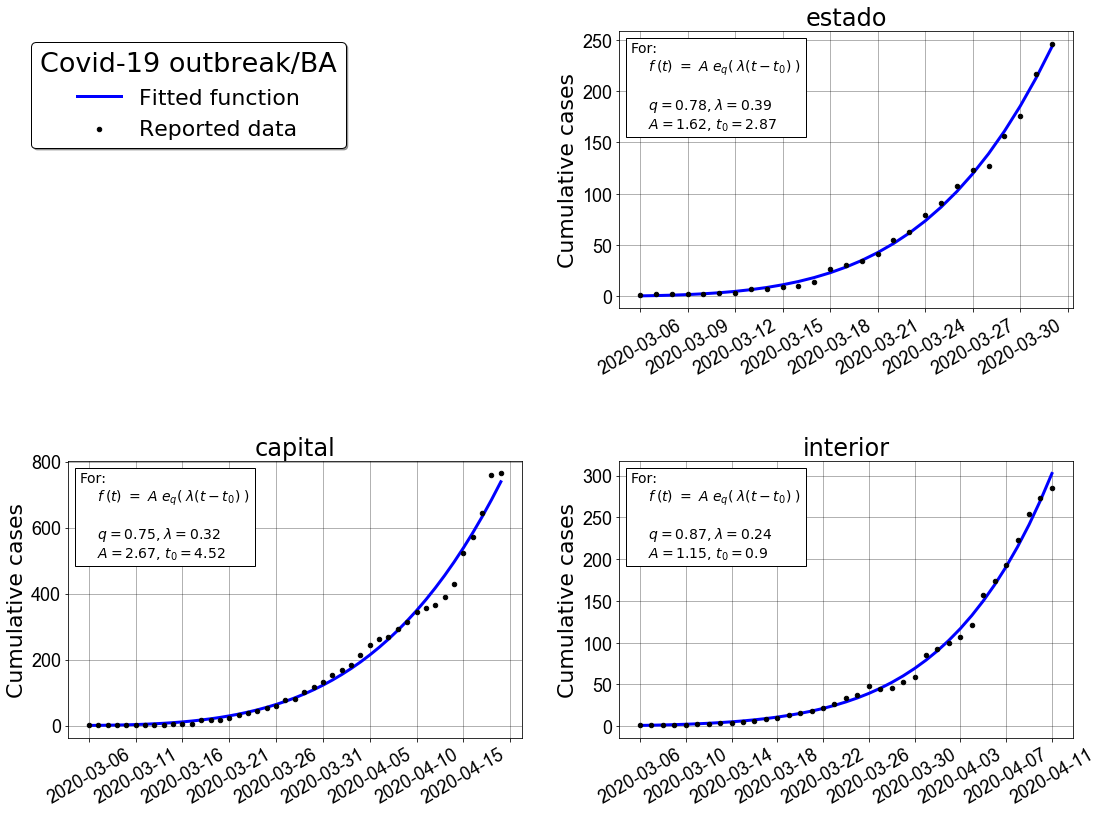

achou 1
achou 2
achou 3
achou 4
achou 5
achou 1
achou 2
achou 3
achou 4
achou 1
achou 2
achou 3
achou 4
achou 5


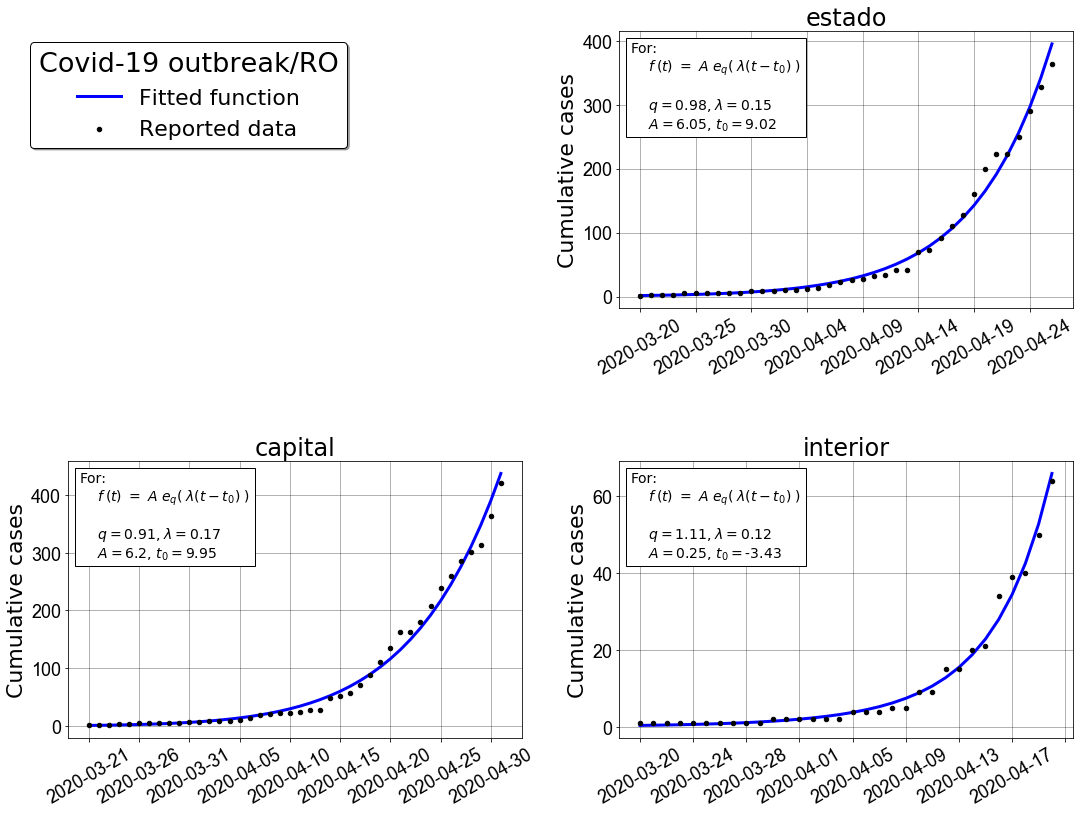

achou 1
achou 2
achou 3
achou 4
achou 5
achou 6
achou 1
achou 2
achou 3
achou 4
achou 1
achou 2
achou 3
achou 4


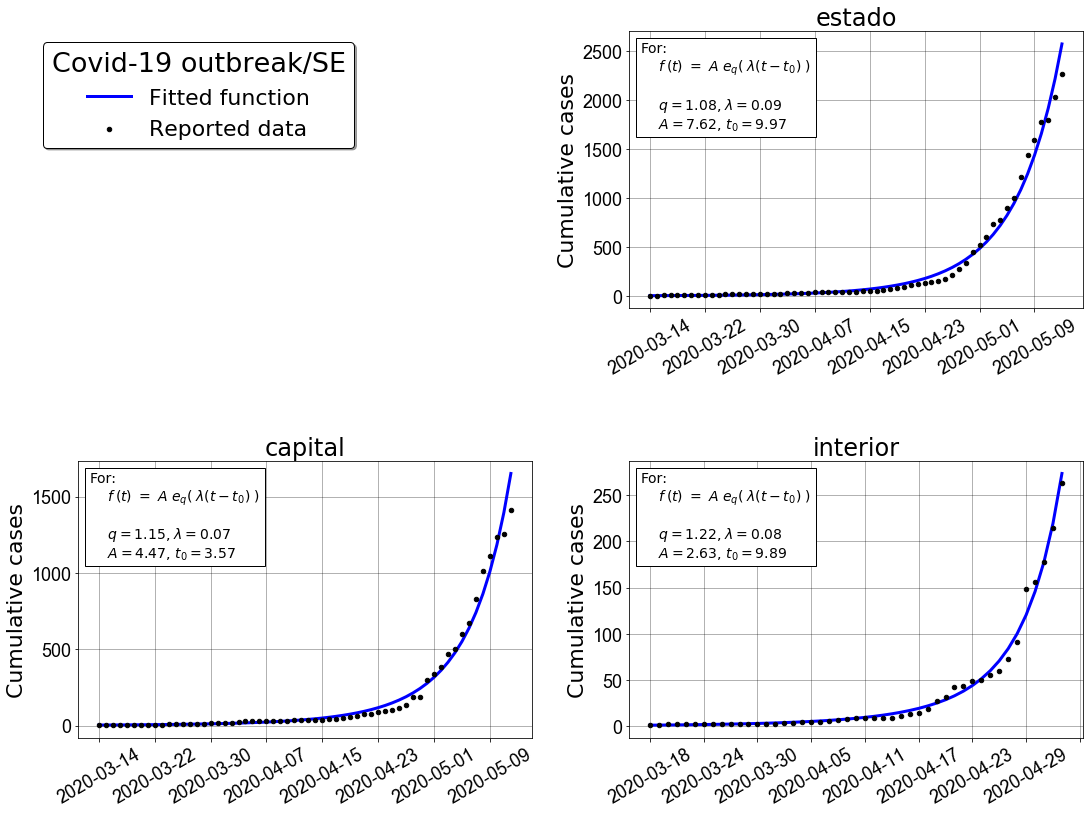

In [11]:
#4444444444444444444444444444444444444444444444444444444444444



#Fitting the q-exp

#Define the state and the type of fit: (estado,capital,interior)
#s=,'BA','GO','RJ','SP'
#,'capital','interior'
#LS=state_dic.keys()
LS=['BA','RO','SE']
df_bf=pd.read_csv('Best_Fits.csv')
miniq=[]
minit_0=[]
miniL=[]
miniA=[]
src=[]




for s in LS:
  
    if s == 'DF':
        
        gs = gridspec.GridSpec(nrows = 2, ncols = 4)

        #Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
        fig=pl.figure(figsize=(18,13))

        #Definir espaco em branco entre os plots
        gs.update(wspace = 0.55)
        gs.update(hspace = 0.55)

        ax=[]
        #Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
        ax1 = pl.subplot(gs[0, 2:]) #Ininicar um plot em branco no centro da primeira linha (0)

        ax.append(ax1)

        k=0


        LF = ['estado']   
        for file in LF:

            #Read csv
            df=pd.read_csv('Data/'+s+"/"+file+".csv")

            #Limit the date of the Fit
            FD = FinD(s,file)
            df = df[df['date']<=FD]

            #Read the file
            dates=df.date.values
            data=df.cases.values

            #Run the minimizer
            q,A,t_0,L=mini(data,85)

            #Create an x axixis for plotting the function.
            t_x=np.arange(len(data))
            
            #saving pars in dataframe
            
            
            miniq.append(q)
            miniA.append(A)
            minit_0.append(t_0)
            miniL.append(L)
            src.append(s+'_'+file)




            #Plotting

            #Create a grid for visualization.
            ax[k].grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

            #Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
            ax[k].scatter(dates,data, s=20,color='black',zorder=3,label='Reported data')

            #Plot the fitted function as a line.
            ax[k].plot(dates,q_exp(t_x,q,A,t_0,L),color='blue', linewidth=3.0,label='Fitted function')





            #Avons

            #If you want to limit the Y axixis -> ax.set_ylim(0.,y_lim).

            #set the legend box
            ax[k].legend(loc='upper left',fontsize=12,fancybox=False, edgecolor='black',facecolor='w',framealpha=1)

            #Set the annotation for the outputs
            annotation_string = r"""For:
    $f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

    $q = ${0}, $\lambda = ${1}
    $A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

            ax[k].annotate(annotation_string, xy=(0.025, 0.42), xycoords='axes fraction',
                                                         backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=10)



            #Set the labels
            ax[k].set_ylabel('Cumulative cases',fontsize=22)

            #Set the title
            ax[k].set_title('Covid-19 Outbreak '+s+'/'+file,fontsize=25)

            #The size of the numbers on the axixis
            ax[k].tick_params(labelsize=18)

            #Limiting the ammount of dates on the X axixs
            ax[k].xaxis.set_major_locator(pl.MaxNLocator(10))
            #Rotating the dates for better visualization
            pl.setp(ax[k].get_xticklabels(), rotation=30)


            #Setting the font of the numbers on the axixis as ARIAL 
            for tick in ax[k].get_xticklabels():
                tick.set_fontname("Arial")
            for tick in ax[k].get_yticklabels():
                tick.set_fontname("Arial")  



            k+=1

        #Show Graph       
        #pl.show()

        #Save Fig
        #fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')
        
        
        
    else:
        LF=['estado', 'capital','interior']

        gs = gridspec.GridSpec(nrows = 2, ncols = 4)

        #Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
        fig=pl.figure(figsize=(18,13))

        #Definir espaco em branco entre os plots
        gs.update(wspace = 0.55)
        gs.update(hspace = 0.55)

        ax=[]
        #Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
        ax1 = pl.subplot(gs[0, 2:]) #Ininicar um plot em branco no centro da primeira linha (0)
        ax2 = pl.subplot(gs[1, :2])  #Ininicar um plot em branco na primeira posicao da segunda linha
        ax3 = pl.subplot(gs[1, 2:])  #Ininicar um plot em branco no segunda posicao da seguna linha

        ax.append(ax1)
        ax.append(ax2)
        ax.append(ax3)
        
        #ax.set_title("Robert Gabriel de Araujo (UFBA)", fontsize=15)

        k=0 


        for file in LF:

            #Read csv
            df=pd.read_csv('Data/'+s+"/"+file+".csv")

            #Limit the date of the Fit
            FD = FinD(s,file)
            df = df[df['date']<=FD]

            #Read the file
            dates=df.date.values
            data=df.cases.values

            #Run the minimizer
            q,A,t_0,L=mini(data,85)
            

            #Create an x axixis for plotting the function.
            t_x=np.arange(len(data))


            #saving pars in dataframe
            
            miniq.append(q)
            miniA.append(A)
            minit_0.append(t_0)
            miniL.append(L)
            src.append(s+'_'+file)
            



            #Plotting

            #Create a grid for visualization.
            ax[k].grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)

            #Plot the points(Scatters). s=size, zorder= priority->(puttin g the points in at the front of everything).
            ax[k].scatter(dates,data, s=20,color='black',zorder=3,label='Reported data')

            #Plot the fitted function as a line.
            ax[k].plot(dates,q_exp(t_x,q,A,t_0,L),color='blue', linewidth=3.0,label='Fitted function')





            #Avons
            
            

            #If you want to limit the Y axixis -> ax.set_ylim(0.,y_lim).
            
            if k==0:

                #set the legend box
                ax[k].legend(loc='upper left',fontsize=14,fancybox=False, edgecolor='black',facecolor='w',framealpha=1)

                #Set the annotation for the outputs
                annotation_string = r"""For:
    $f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

    $q = ${0}, $\lambda = ${1}
    $A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

                ax[k].annotate(annotation_string, xy=(0.025,  0.65), xycoords='axes fraction',
                                                             backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=14)

            else:
                 #Set the annotation for the outputs
                annotation_string = r"""For:
    $f\,(t) \ = \ A \; e_q (\;{{\lambda (t-t_0)}}\;)$ 

    $q = ${0}, $\lambda = ${1}
    $A = ${2}, $t_0 = ${3}""".format(round(q,2), round(L,2),round(A,2),round(t_0,2))

                ax[k].annotate(annotation_string, xy=(0.025, 0.65), xycoords='axes fraction',
                                                             backgroundcolor='w',bbox=dict(boxstyle="Square",fc="w"), fontsize=14)

                

            #Set the labels
            ax[k].set_ylabel('Cumulative cases',fontsize=22)

            #Set the title
            ax[k].set_title(file,fontsize=24)

            #The size of the numbers on the axixis
            ax[k].tick_params(labelsize=18)

            #Limiting the ammount of dates on the X axixs
            ax[k].xaxis.set_major_locator(pl.MaxNLocator(10))
            #Rotating the dates for better visualization
            pl.setp(ax[k].get_xticklabels(), rotation=30)


            #Setting the font of the numbers on the axixis as ARIAL 
            for tick in ax[k].get_xticklabels():
                tick.set_fontname("Arial")
            for tick in ax[k].get_yticklabels():
                tick.set_fontname("Arial")  



            k+=1
            
        ax1.legend(loc='upper center',title='Covid-19 outbreak/'+s ,title_fontsize=27, bbox_to_anchor=(-0.95, 1),fontsize=22,fancybox=True, shadow=True,framealpha=None,edgecolor='inherit')
        
        #Show Graph       
        pl.show()

        #Save Fig
        fig.savefig(r"Fits\\"+s+file+".png",bbox_inches='tight')
        

datfrm = {'Source':src,
        'q': miniq,
        'A':miniA,
        't_0':minit_0,
        'L':miniL
        }

dfrm=pd.DataFrame(datfrm, columns = ['Source','q','A','t_0','L'])

dfrm.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='covid_dataframe.csv')  
dfrm.to_csv('covid_dataframe.zip', index=False,
          compression=compression_opts)